In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Dataset_1 = "COMP1801_CourseworkDataset1_tabular.csv"

In [ ]:
df = pd.read_csv(Dataset_1)
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658847,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


<ipython-input-44-ba9ab4a3135a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:-1].corr(), annot=True,cmap='coolwarm')


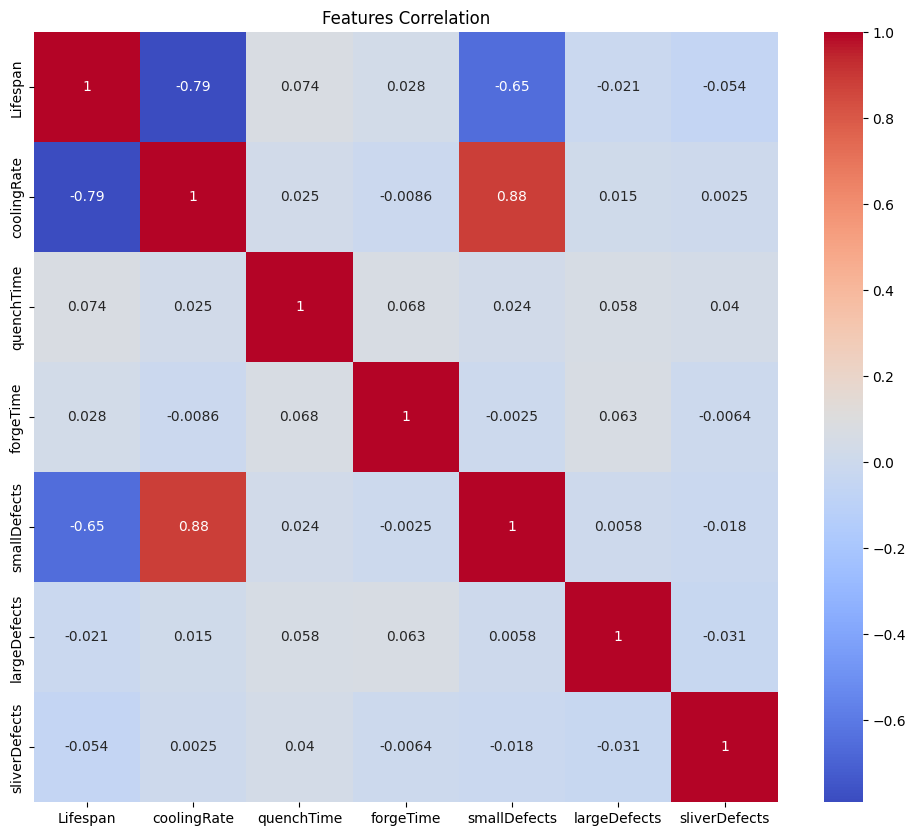

In [ ]:
#Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True,cmap='coolwarm')
plt.title('Features Correlation')
plt.show()

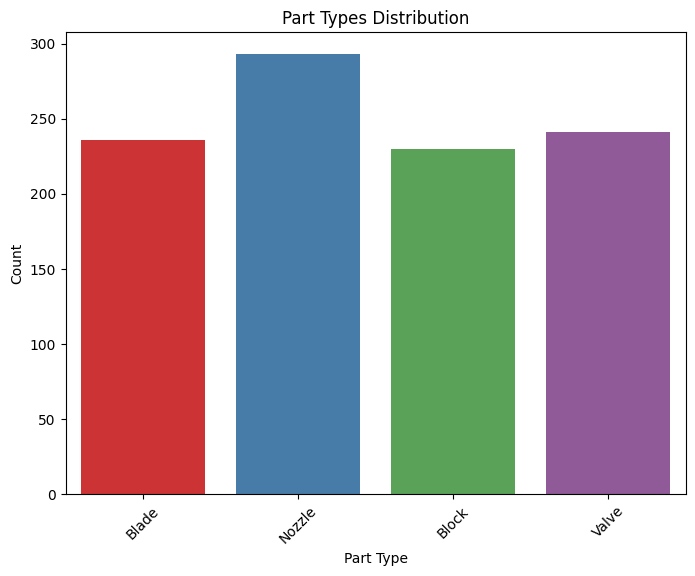

In [ ]:
# Bar chart for Part Types
plt.figure(figsize=(8, 6))
custom_colors = sns.color_palette("Set1")
sns.countplot(data=df, x='partType', palette=custom_colors)
plt.title('Part Types Distribution')
plt.xlabel('Part Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

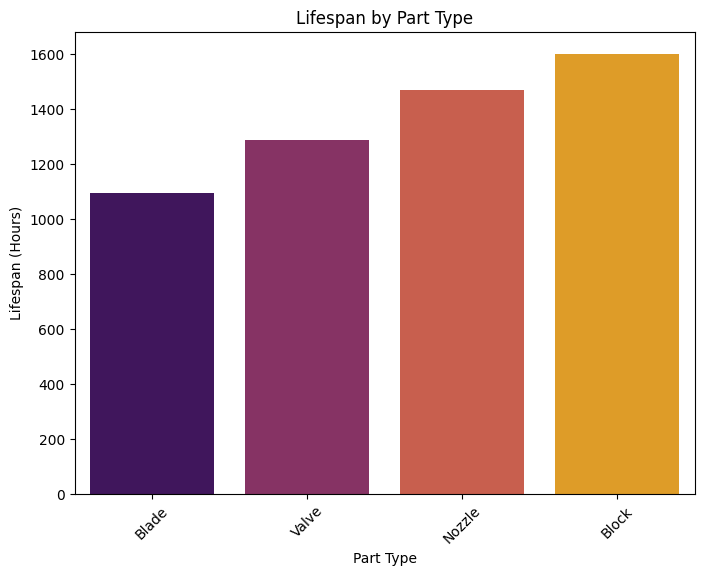

In [ ]:
# Lifespan for each partType barchart
plt.figure(figsize=(8, 6))
order = df.groupby('partType')['Lifespan'].mean().sort_values().index

sns.barplot(data=df, x='partType', y='Lifespan', order=order, palette="inferno", errorbar=None)
plt.title('Lifespan by Part Type')
plt.xlabel('Part Type')
plt.ylabel('Lifespan (Hours)')
plt.xticks(rotation=45)
plt.show()


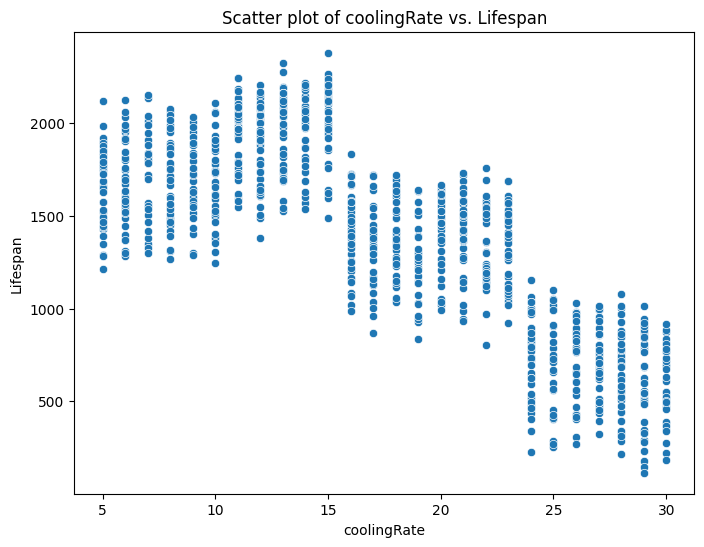

In [ ]:
##scatterplot of cooling rate vs lifespan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coolingRate', y='Lifespan', data=df)
plt.title('Scatter plot of coolingRate vs. Lifespan')
plt.show()

In [ ]:
from scipy.stats import f_oneway
#Checking the impact of coolingrate on Lifespan
part_types = df['coolingRate'].unique()
groups = [df[df['coolingRate'] == part]['Lifespan'] for part in part_types]

f_statistic, p_value = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_statistic}')
print(f'p-value: {p_value}')


ANOVA F-statistic: 191.63262940873298
p-value: 0.0


In [ ]:
#One hot encoding sring columns
df = pd.get_dummies(df, columns=['partType'], prefix='partType')


df = pd.get_dummies(df, columns=['microstructure'], prefix='microstructure')


df = pd.get_dummies(df, columns=['seedLocation'], prefix='seedLocation')


df = pd.get_dummies(df, columns=['castType'], prefix='castType')


# REGRESSION IMPLEMENTATION

Random Forest

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']] = scaler.fit_transform(df[['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']])


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset
X = df.drop('Lifespan', axis=1)
y = df['Lifespan']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


Random_model = RandomForestRegressor(n_estimators=50,random_state=42)
Random_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
# Making predictions on the test data
y_pred_rf = Random_model.predict(X_test)

In [ ]:
y_pred_rf

array([1188.93781513, 1881.589343  ,  679.16988721, 1576.84240816,
        875.77686044, 1165.25830463, 1775.71583081,  533.7806442 ,
       1535.31816052,  814.59562433,  902.89078856, 1549.75124793,
       1165.3984488 , 2147.58612396, 1858.33736116, 1917.14612872,
        687.42050708, 1063.59869783,  521.76637521, 2160.85107549,
       2071.0726933 , 1587.17351873, 1589.91243326,  727.43470238,
        677.40898268, 1807.90230699,  379.8685982 , 1459.15559255,
       1279.47321522, 1402.74060687, 1551.90389509,  871.41331264,
       1529.9925843 , 1278.7440986 , 1005.29802329,  498.81354358,
       1775.38035922, 1937.7730189 , 2048.13270206, 1765.78900665,
        603.35182616, 1975.38932263, 2048.64381978, 1652.32190796,
        466.08066446, 1740.39201513,  557.04154948, 1521.34895833,
       1071.45229037,  976.5331139 , 1645.61181026,  550.43351438,
        649.97874335, 1555.13139606, 1634.06827762, 1968.8258167 ,
       1213.48404226, 1320.78349344,  703.64409826, 1305.86964

In [ ]:
#Random Forest Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculatiing regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R²):", r2_rf)

Random Forest Regression Metrics:
Mean Squared Error (MSE): 5612.14669780368
Root Mean Squared Error (RMSE): 74.91426231235064
R-squared (R²): 0.9804408274040759


Hyper-paramter Tuning The Random Forest Model

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)


In [ ]:
# Fitting the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Searching for the best hyperparameters
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
#Training the Random Forest model with the best hyperparameters
best_random_forest_model = RandomForestRegressor(random_state=42, **best_hyperparameters)
best_random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
#Making predictions on the test data using the best Random Forest model
y_pred_tunedrf = best_random_forest_model.predict(X_test)

In [ ]:
#Calculating regression metrics
mse_rftuned= mean_squared_error(y_test, y_pred_tunedrf)
rmse_rftuned = np.sqrt(mse_rftuned)
r2_rftuned = r2_score(y_test, y_pred_tunedrf)

#Printing metrics for the Random Forest Regression model
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rftuned)
print("Root Mean Squared Error (RMSE):", rmse_rftuned)
print("R-squared (R²):", r2_rftuned)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 5575.183536672413
Root Mean Squared Error (RMSE): 74.66715165768956
R-squared (R²): 0.9805696495620106


Ridge Model

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [ ]:
# Making predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
# Evaluating the basic Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)


print('Ridge model metrics')
print(f'Mean Squared Error (Basic Ridge): {mse_ridge}')
print(f'Root Mean Squared Error (Basic Ridge): {rmse_ridge}')
print(f'R-squared (Basic Ridge): {r2_ridge}')

Ridge model metrics
Mean Squared Error (Basic Ridge): 49271.838423794376
Root Mean Squared Error (Basic Ridge): 221.97260737260888
R-squared (Basic Ridge): 0.8282802564254722


Hyper-Tuning the Ridge Model

In [ ]:
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

In [ ]:
# Performing grid search to find the best hyperparameters
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Getting the best hyperparameters
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_alpha_ridge

1.0

In [ ]:
# Training the final Ridge model with the best hyperparameters
Ridgetuned = Ridge(alpha=best_alpha_ridge)
Ridgetuned.fit(X_train, y_train)

Ridge()

In [ ]:
# Make predictions on the test set
y_pred_ridge_Tuned = Ridgetuned.predict(X_test)

In [ ]:
# Evaluating the Ridge model
Tuned_mse_ridge = mean_squared_error(y_test, y_pred_ridge_Tuned)
Tuned_rmse_ridge = np.sqrt(Tuned_mse_ridge)
Tuned_r2_ridge = r2_score(y_test, y_pred_ridge_Tuned)


print('Hyper-Tuned Ridge model metrics')
print(f'Mean Squared Error (Ridge): {Tuned_mse_ridge}')
print(f'Root Mean Squared Error (Ridge): {Tuned_rmse_ridge}')
print(f'R-squared (Ridge): {Tuned_r2_ridge}')

Hyper-Tuned Ridge model metrics
Mean Squared Error (Ridge): 49271.838423794376
Root Mean Squared Error (Ridge): 221.97260737260888
R-squared (Ridge): 0.8282802564254722


# BINARY CLASSIFICATIONIMPLEMENTATION

In [ ]:
#creating threshold
threshold = 1500
df['Defective'] = (df['Lifespan'] <= threshold).astype(int)
df = df.drop(columns=['Lifespan'])

In [ ]:
#creating a binary target variable
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

Support Vector Classifier Model

In [ ]:
#Importing Necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [ ]:
# Creating the SVc model
svc_clf = SVC(random_state=42, probability=True)  # Using probability=True for easier thresholding

# Training the model on the training data
svc_clf.fit(X_train, y_train_binary)

SVC(probability=True, random_state=42)

In [ ]:
# Predicting on the test data
y_pred_svc = svc_clf.predict(X_test)

In [ ]:
#Evaluating the SVC model
accuracy_svc = accuracy_score(y_test_binary, y_pred_svc)
precision_svc = precision_score(y_test_binary, y_pred_svc)
recall_svc = recall_score(y_test_binary, y_pred_svc)
f1_svc = f1_score(y_test_binary, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test_binary, y_pred_svc)
class_report_svc = classification_report(y_test_binary, y_pred_svc)

print("SVC Model Metrics:")
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)
print("Confusion Matrix:\n", confusion_matrix_svc)
print(f'Classification Report (Support Vector Classifier):\n{class_report_svc}')

SVC Model Metrics:
Accuracy: 0.9
Precision: 0.8631578947368421
Recall: 0.9213483146067416
F1 Score: 0.891304347826087
Confusion Matrix:
 [[98 13]
 [ 7 82]]
Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       111
           1       0.86      0.92      0.89        89

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Hypertuning the SVC model

In [ ]:
#Defining a grid of hyperparameters to search
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [ ]:
#Creating a GridSearchCV object for SVM
grid_search_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svc,
    scoring='accuracy',
    cv=5
)

In [ ]:
#Fitting the GridSearchCV object on the training data
grid_search_svc.fit(X_train, y_train_binary)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
#Getting the best hyperparameters
best_svc_hyperparameters = grid_search_svc.best_params_
print("Best Hyperparameters (SVM):", best_svc_hyperparameters)

Best Hyperparameters (SVM): {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svc_clftuned = SVC(C=1, gamma=0.1, kernel='rbf', random_state=42)

In [ ]:
svc_clftuned.fit(X_train,y_train_binary)

SVC(C=1, gamma=0.1, random_state=42)

In [ ]:
#Evaluating the SVC model on the test data
y_pred_svctuned = svc_clftuned.predict(X_test)


In [ ]:
y_pred_svctuned

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#Evaluating the SVC model
accuracy_svctuned = accuracy_score(y_test_binary, y_pred_svctuned)
precision_svctuned = precision_score(y_test_binary, y_pred_svctuned)
recall_svctuned = recall_score(y_test_binary, y_pred_svctuned)
f1_score_svctuned = f1_score(y_test_binary, y_pred_svctuned)
confusion_matrix_svctuned = confusion_matrix(y_test_binary, y_pred_svctuned)
class_report_svctuned = classification_report(y_test_binary, y_pred_svctuned)


#Printing the metrics
print("SVC Tuned Model Metrics:")
print(f"Accuracy: {accuracy_svctuned}")
print(f"Precision: {precision_svctuned}")
print(f"Recall: {recall_svctuned}")
print(f"F1 Score: {f1_score_svctuned}")
print("Confusion Matrix:")
print(confusion_matrix_svctuned)
print(f'Classification Report (SVC Tuned Model):\n{class_report_svctuned}')

SVC Tuned Model Metrics:
Accuracy: 0.895
Precision: 0.8541666666666666
Recall: 0.9213483146067416
F1 Score: 0.8864864864864865
Confusion Matrix:
[[97 14]
 [ 7 82]]
Classification Report (SVC Tuned Model):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       111
           1       0.85      0.92      0.89        89

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating and training the logistic model
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train_binary)

LogisticRegression()

In [ ]:
#Making Predictions on the test data
y_pred_logclf=log_clf.predict(X_test)

In [ ]:
#Evaluating Logistic Regression
accuracy_logclf = accuracy_score(y_test_binary, y_pred_logclf)
precision_logclf= precision_score(y_test_binary, y_pred_logclf)
recall_logclf = recall_score(y_test_binary, y_pred_logclf)
f1_logclf = f1_score(y_test_binary, y_pred_logclf)
conf_matrix_logclf = confusion_matrix(y_test_binary, y_pred_logclf)
class_report_logclf = classification_report(y_test_binary, y_pred_logclf)

print(f'Accuracy (Logistic Regression): {accuracy_logclf}')
print(f'Precision (Logistic Regression): {precision_logclf}')
print(f'F1 Score (Logistic Regression): {f1_logclf}')
print(f'Recall (Logistic Regression): {recall_logclf}')
print(f'Confusion Matrix (Logistic Regression):\n{conf_matrix_logclf}')
print(f'Classification Report (Logistic Regression):\n{class_report_logclf}')

Accuracy (Logistic Regression): 0.885
Precision (Logistic Regression): 0.8666666666666667
F1 Score (Logistic Regression): 0.8715083798882682
Recall (Logistic Regression): 0.8764044943820225
Confusion Matrix (Logistic Regression):
[[99 12]
 [11 78]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       111
           1       0.87      0.88      0.87        89

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



Hyper-Tuning Logistic Regression

In [ ]:
param_grid_logclftuned = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
# Performing grid search to find the best hyperparameters
grid_search_logclftuned = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_logclftuned, scoring='accuracy', cv=5)


grid_search_logclftuned.fit(X_train, y_train_binary)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
#Getting the best hyperparameters
best_C_logclftuned = grid_search_logclftuned.best_params_['C']
best_C_logclftuned

0.1

In [ ]:
#Training the final Logistic Regression model with the best hyperparameters
tuned_logclf = LogisticRegression(C=0.1)
tuned_logclf.fit(X_train, y_train_binary)

LogisticRegression(C=0.1)

In [ ]:
#Making predictions on the test set with the final model
y_pred_logclftuned = tuned_logclf.predict(X_test)

In [ ]:
#Evaluating the tuned model
accuracy_logclftuned = accuracy_score(y_test_binary, y_pred_logclftuned)
precision_logclftuned = precision_score(y_test_binary, y_pred_logclftuned)
recall_logclftuned = recall_score(y_test_binary, y_pred_logclftuned)
f1_logclftuned = f1_score(y_test_binary, y_pred_logclftuned)
conf_matrix_logclftuned = confusion_matrix(y_test_binary, y_pred_logclftuned)
class_report_logclftuned = classification_report(y_test_binary, y_pred_logclftuned)


print('Tuned Logistic Regression Metrics')
print(f'Accuracy (Logistic Regression): {accuracy_logclftuned}')
print(f'Precision (Logistic Regression): {precision_logclftuned}')
print(f'F1 Score (Logistic Regression): {f1_logclftuned}')
print(f'Recall (Logistic Regression): {recall_logclftuned}')
print(f'Confusion Matrix (Logistic Regression):\n{conf_matrix_logclftuned}')
print(f'Classification Report (Tuned Logistic Regression):\n{class_report_logclftuned}')

Tuned Logistic Regression Metrics
Accuracy (Logistic Regression): 0.885
Precision (Logistic Regression): 0.8666666666666667
F1 Score (Logistic Regression): 0.8715083798882682
Recall (Logistic Regression): 0.8764044943820225
Confusion Matrix (Logistic Regression):
[[99 12]
 [11 78]]
Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       111
           1       0.87      0.88      0.87        89

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



# CNN IMPLEMENTATION

In [ ]:
#Importing Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential

In [ ]:
import pandas as pd
import numpy as np
Dataset2= 'COMP1801_CourseworkDataset2_images_metadata.csv'
metadata= pd.read_csv(Dataset2)

In [ ]:
import os

destination_folder = '/content/images'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)


In [ ]:
import zipfile
import io

zip_file = 'COMP1801_CourseworkDataset2_images.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('images')


In [ ]:
# Folder containing images
import os
image_folder = '/content/images/COMP1801_CourseworkDataset2_images'
image_files = os.listdir(image_folder)

images = []
labels = []



In [ ]:
from keras.preprocessing.image import load_img,img_to_array
# Data preprocessing
for file in image_files:
    if file.endswith('.png'):
        image_path = os.path.join(image_folder, file)
        img = load_img(image_path, target_size=(128, 128))
        img_array = img_to_array(img)
        images.append(img_array)

        # Getting the label for the image from the metadata
        image_name = os.path.basename(file)
        label_defect = metadata.loc[metadata['Image Filename'] == image_name, 'Defect'].values[0]
        label_type = metadata.loc[metadata['Image Filename'] == image_name, 'Type'].values[0]

        label_defect = 1 if label_defect == 'Yes' else 0  # Binary label for defect (Yes/No)
        labels.append(label_type)  # Using 'Type' as labels for multiclass classification


In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
metadata

,Image Filename,Defect,Type
0,scan_0.png,Yes,Splinter
1,scan_1.png,No,None
2,scan_2.png,Yes,Multiple
3,scan_3.png,No,None
4,scan_4.png,No,None
...,...,...,...
995,scan_995.png,Yes,Large
996,scan_996.png,No,None
997,scan_997.png,No,None
998,scan_998.png,No,None


In [ ]:
# One-hot encoding 'Type' column for multiclass classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Reshape labels to a column vector
labels_reshaped = labels.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
labels_onehot = encoder.fit_transform(labels_reshaped)

# Split the data into training and testing sets
image_train, image_test, label_train, label_test = train_test_split(images, labels_onehot, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

Densenet121

In [ ]:
from tensorflow.keras.applications import DenseNet121

#Loading DenseNet121 model
dense_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
#Adding custom classification head
q = dense_model.output
q = GlobalAveragePooling2D()(q)
q = Dense(1024, activation='relu')(q)
prediction = Dense(4, activation='softmax')(q)  # num_classes is the number of output classes

In [ ]:
from tensorflow.keras.models import Model
dense_models = Model(inputs=dense_model.input, outputs=prediction)

In [ ]:
# Freeze the layers of the base model
for layer in dense_model.layers:
    layer._name = layer._name + str("_base")  # To avoid Graph disconnected error
    layer.trainable = False

In [ ]:
# Compile the model
dense_models.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
dense_history = dense_models.fit(image_train, label_train, epochs=10, batch_size=32, validation_data=(image_test, label_test))

Epoch 1/10
25/25 [==============================] - 45s 2s/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.0253 - val_accuracy: 0.9900
Epoch 2/10
25/25 [==============================] - 45s 2s/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0202 - val_accuracy: 0.9950
Epoch 3/10
25/25 [==============================] - 46s 2s/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0281 - val_accuracy: 0.9900
Epoch 4/10
25/25 [==============================] - 46s 2s/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0212 - val_accuracy: 0.9900
Epoch 5/10
25/25 [==============================] - 45s 2s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 45s 2s/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9950
Epoch 7/10
25/25 [==============================] - 45s 2s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9950
Epoch 8/10
25/25 [==

In [ ]:
# Evaluating the model on the test set
dense_predictions = dense_models.predict(image_test)
predicted_labels = np.argmax(dense_predictions, axis=1)


7/7 [==============================] - 13s 2s/step


In [ ]:
true_labels = np.argmax(label_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
#Evaluation
accuracy = accuracy_score(np.argmax(label_test, axis=1), predicted_labels)
precision = precision_score(np.argmax(label_test, axis=1), predicted_labels, average='weighted')
recall = recall_score(np.argmax(label_test, axis=1), predicted_labels, average='weighted')
f1 = f1_score(np.argmax(label_test, axis=1), predicted_labels, average='weighted')
conf_matrix = confusion_matrix(np.argmax(label_test, axis=1), predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))

Accuracy: 0.995
Precision: 0.9950393700787401
Recall: 0.995
F1 Score: 0.9949860718991154
Confusion Matrix:
[[  7   0   0   0]
 [  0  52   1   0]
 [  0   0 126   0]
 [  0   0   0  14]]
Classification Report:
              precision    recall  f1-score   support

       Large       1.00      1.00      1.00         7
    Multiple       1.00      0.98      0.99        53
        None       0.99      1.00      1.00       126
    Splinter       1.00      1.00      1.00        14

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



Xception Model

In [ ]:
#creating the exception model
xception_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3),
    pooling='avg'
)

Xceptionmodel = models.Sequential([
    xception_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# Compiling the model
Xceptionmodel.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#Training the model
Xception_history = Xceptionmodel.fit(image_train, label_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
20/20 [==============================] - 203s 9s/step - loss: 1.0710 - accuracy: 0.6469 - val_loss: 1.0151 - val_accuracy: 0.7500
Epoch 2/10
20/20 [==============================] - 177s 9s/step - loss: 0.3618 - accuracy: 0.9625 - val_loss: 1.4953 - val_accuracy: 0.6562
Epoch 3/10
20/20 [==============================] - 178s 9s/step - loss: 0.1164 - accuracy: 0.9766 - val_loss: 0.6126 - val_accuracy: 0.8500
Epoch 4/10
20/20 [==============================] - 179s 9s/step - loss: 0.0483 - accuracy: 0.9922 - val_loss: 0.1354 - val_accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 178s 9s/step - loss: 0.0250 - accuracy: 0.9953 - val_loss: 0.1571 - val_accuracy: 0.9750
Epoch 6/10
20/20 [==============================] - 187s 9s/step - loss: 0.0174 - accuracy: 0.9969 - val_loss: 0.1796 - val_accuracy: 0.9688
Epoch 7/10
20/20 [==============================] - 211s 10s/step - loss: 0.0115 - accuracy: 0.9953 - val_loss: 0.1960 - val_accuracy: 0.9500
Epoch 8/10
2

In [ ]:
# Evaluating the model on the test set
xceptionmodel_predictions = Xceptionmodel.predict(image_test)
xceptionpredicted_labels = np.argmax(xceptionmodel_predictions, axis=1)

7/7 [==============================] - 15s 2s/step


In [ ]:
xceptiontrue_labels = np.argmax(label_test,axis=1)

In [ ]:
#Evaluation
conf_matrix_xceptionmodel= confusion_matrix(xceptiontrue_labels, xceptionpredicted_labels)
accuracy_xceptionmodel = accuracy_score(xceptiontrue_labels, xceptionpredicted_labels)
precision_xceptionmodel = precision_score(xceptiontrue_labels, xceptionpredicted_labels, average='weighted')
recall_xceptionmodel = recall_score(xceptiontrue_labels, xceptionpredicted_labels, average='weighted')
f1_xceptionmodel = f1_score(xceptiontrue_labels, xceptionpredicted_labels, average='weighted')


print("Xception model Evaluation Metrics")
print(f"Overall Accuracy: {accuracy_xceptionmodel:.4f}")
print(f"Precision: {precision_xceptionmodel:.4f}")
print(f"Recall: {recall_xceptionmodel:.4f}")
print(f"F1-Score: {f1_xceptionmodel:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xceptionmodel)
print("Classification Report:")
print(classification_report(xceptiontrue_labels, xceptionpredicted_labels, target_names=label_encoder.classes_))

Xception model Evaluation Metrics
Overall Accuracy: 0.9800
Precision: 0.9814
Recall: 0.9800
F1-Score: 0.9802
Confusion Matrix:
[[  7   0   0   0]
 [  0  53   0   0]
 [  0   4 122   0]
 [  0   0   0  14]]
Classification Report:
              precision    recall  f1-score   support

       Large       1.00      1.00      1.00         7
    Multiple       0.93      1.00      0.96        53
        None       1.00      0.97      0.98       126
    Splinter       1.00      1.00      1.00        14

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
# Access accuracy for each epoch
Xception_accuracy = Xception_history.history['accuracy']
densenet_accuracy = dense_history.history['accuracy']

# Access validation accuracy for each epoch
Xception_val_accuracy = Xception_history.history['val_accuracy']
densenet_val_accuracy = dense_history.history['val_accuracy']

# Access loss for each epoch
Xception_loss = Xception_history.history['loss']
densenet_loss = dense_history.history['loss']

# Access validation loss for each epoch
Xception_val_loss = Xception_history.history['val_loss']
densenet_val_loss = dense_history.history['val_loss']


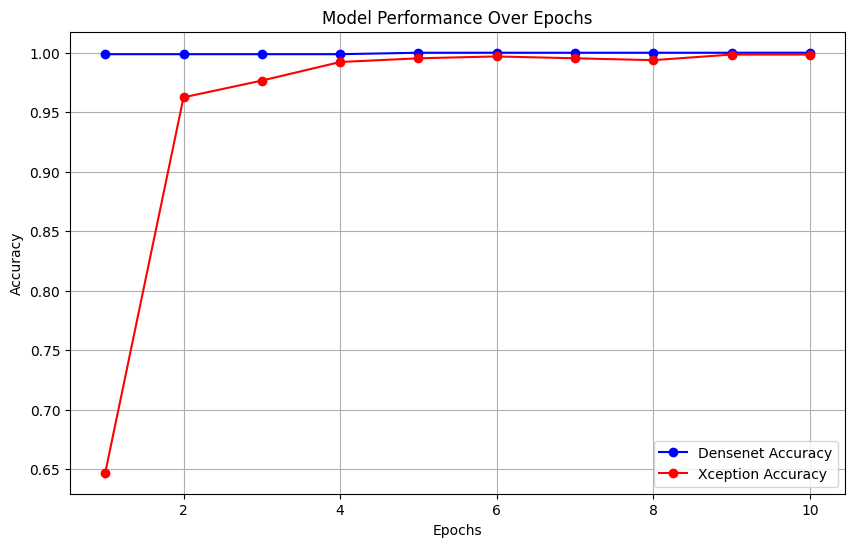

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(densenet_accuracy) + 1)  # assuming both models ran for the same number of epochs

plt.figure(figsize=(10, 6))

# Plotting accuracy over epochs
plt.plot(epochs, densenet_accuracy, 'bo-', label='Densenet Accuracy')
plt.plot(epochs, Xception_accuracy, 'ro-', label='Xception Accuracy')

plt.title('Model Performance Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Evaluatinf on test data using densenet121
test_loss, test_accuracy = dense_models.evaluate(image_test, label_test)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


7/7 [==============================] - 13s 2s/step - loss: 0.0180 - accuracy: 0.9950
Test Accuracy: 0.9950000047683716
Test Loss: 0.018002772703766823


# Clustering Implementation

In [ ]:
#Choosing Continous variables to be used
df = pd.read_csv(Dataset_1)
df_continous = df[['Lifespan','coolingRate','quenchTime','forgeTime','smallDefects']]

In [ ]:
data = df_continous
data

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects
0,284.161690,25,4.460592,7.937116,22
1,1599.551748,9,1.425973,2.432948,2
2,768.311031,26,2.508879,3.841211,25
3,1697.663828,12,3.248913,2.610700,10
4,1491.478862,20,1.901670,4.634926,24
...,...,...,...,...,...
995,462.984817,24,2.023624,2.741713,20
996,1426.298870,21,1.741670,7.206022,12
997,1538.072772,14,1.658847,8.276388,12
998,1893.052813,9,2.124314,5.033330,0


In [ ]:
#Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_continuous_scaled = scaler.fit_transform(data)


In [ ]:
df_continuous_scaled

array([[-2.08612312,  0.99547566,  1.26832208,  0.93407277,  1.06974159],
       [ 0.44948559, -1.12255766, -1.03015474, -1.17303252, -1.40966874],
       [-1.15285373,  1.12785274, -0.20994176, -0.6339214 ,  1.44165313],
       ...,
       [ 0.33097578, -0.46067225, -0.85377094,  1.0639528 , -0.16996358],
       [ 1.01525227, -1.12255766, -0.50121827, -0.17755449, -1.65760977],
       [-0.83643095,  1.26022983, -1.20888333, -0.58087789,  0.69783004]])

In [ ]:
#Silhoette score to get the optimal k means number
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))


In [ ]:
optimal_k = np.argmax(silhouette_scores) + 2  # Adding because the loop starts from k=2
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 2


In [ ]:
# Applying KMeans with the optimal number of clusters
k = 2  #based on the optimal number of cluster
kmeans = KMeans(n_clusters=k, random_state=42, n_init =10)
kmeans.fit(df_continuous_scaled)

# Assigning the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_


<ipython-input-106-12098f049312>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


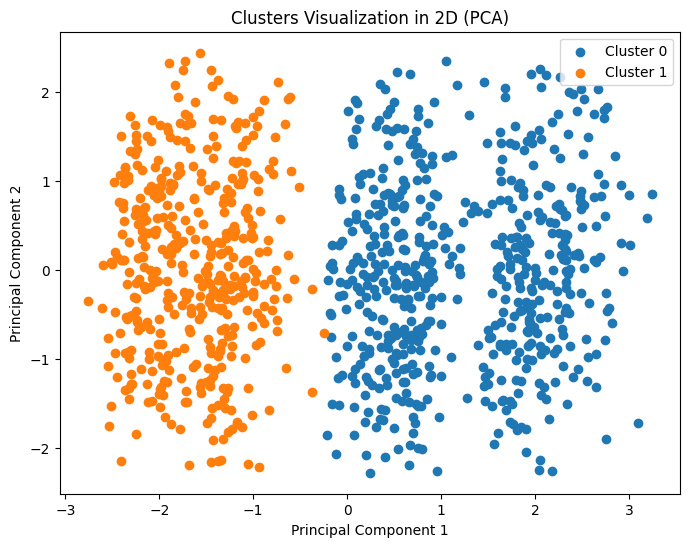

In [ ]:
#Visualizing clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Performing PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_continuous_scaled)

# Creating a DataFrame with the principal components and the cluster labels
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_  # Assuming 'kmeans' is the KMeans object with your clusters

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Exploring Relationships

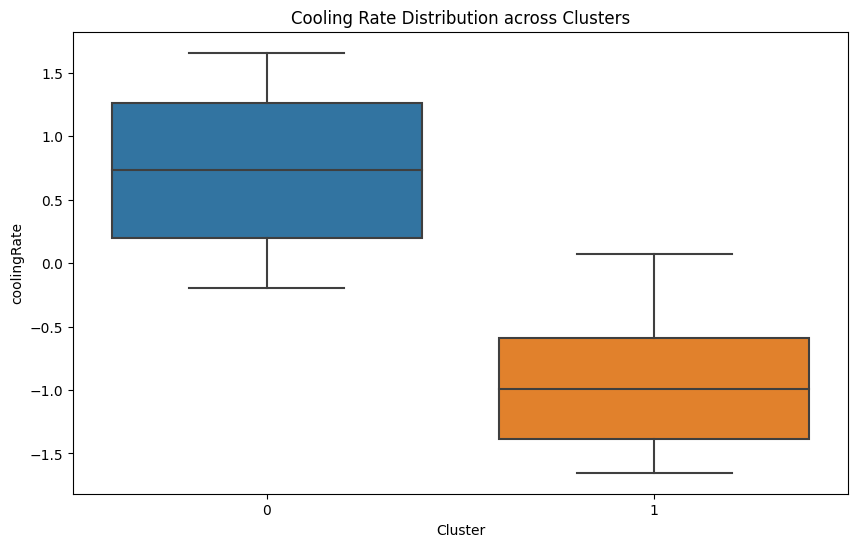

In [ ]:
import seaborn as sns

df_with_labels = pd.DataFrame(df_continuous_scaled, columns=data.columns[:-1])
df_with_labels['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='coolingRate', data=df_with_labels)
plt.title('Cooling Rate Distribution across Clusters')
plt.show()



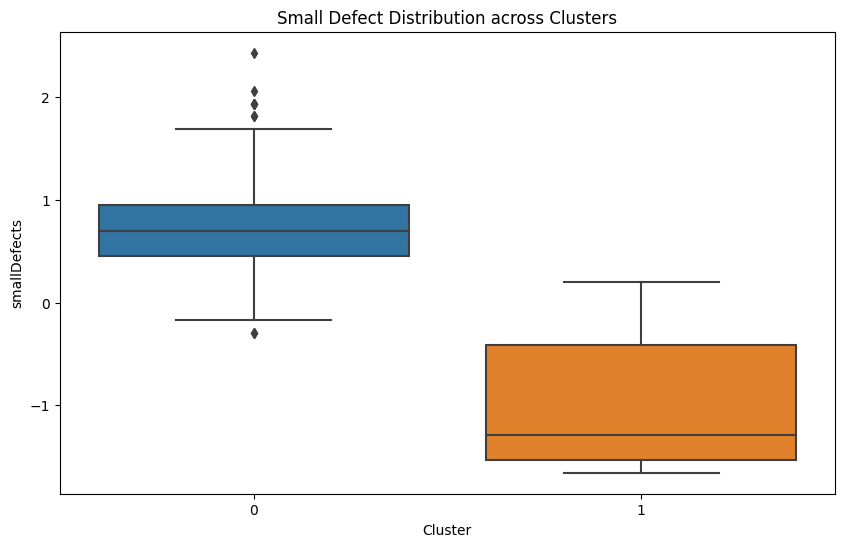

In [ ]:
data_with_labels = pd.DataFrame(df_continuous_scaled, columns=data.columns[:-1])
data_with_labels['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='smallDefects', data=data_with_labels)
plt.title('Small Defect Distribution across Clusters')
plt.show()



In [ ]:
#Using the selected binary classification model on the full dataset to be able to compare
# Combine the full dataset
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train_binary, y_test_binary])

In [ ]:
#Predicting with the support vector classifier tuned model
y_pred_full = svc_clftuned.predict(X_full)

In [ ]:
y_pred_full

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

Comparing Binary Classification to Kmeans

In [ ]:
predictions = pd.DataFrame(y_pred_full, columns=['Predictions'])
# Creating a comparison DataFrame by using the predicted values and k-means labels directly
comparison_df = pd.DataFrame({'Binary_Predictions': predictions.values.ravel(), 'Kmeans_Cluster_Labels': kmeans.labels_})
print(comparison_df)

     Binary_Predictions  Kmeans_Cluster_Labels
0                     1                      0
1                     1                      1
2                     0                      0
3                     1                      1
4                     0                      0
..                  ...                    ...
995                   1                      0
996                   1                      0
997                   1                      1
998                   1                      1
999                   1                      0

[1000 rows x 2 columns]
